# `regression.XGBoostCVRegressor`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import slickml

print(f"Loaded SlickML Version = {slickml.__version__}")

Loaded SlickML Version = 0.2.0b0


In [19]:
from slickml.regression import XGBoostCVRegressor

help(XGBoostCVRegressor)

Help on class XGBoostCVRegressor in module slickml.regression._xgboostcv:

class XGBoostCVRegressor(slickml.regression._xgboost.XGBoostRegressor)
 |  XGBoostCVRegressor(num_boost_round: Optional[int] = 200, sparse_matrix: Optional[bool] = False, scale_mean: Optional[bool] = False, scale_std: Optional[bool] = False, importance_type: Optional[str] = 'total_gain', params: Optional[Dict] = None, n_splits: Optional[int] = 4, metrics: Optional[str] = 'rmse', early_stopping_rounds: Optional[int] = 20, random_state: Optional[int] = 1367, shuffle: Optional[bool] = True, verbose: Optional[bool] = True, callbacks: Optional[bool] = False) -> None
 |  
 |  XGBoost CV Regressor.
 |  
 |  This is wrapper using ``XGBoostRegressor`` to train a XGBoost [xgboost-api]_ model with using the optimum
 |  number of boosting rounds from the inputs. It used ``xgboost.cv()`` model with n-folds
 |  cross-validation and train model based on the best number of boosting round to avoid over-fitting.
 |  
 |  Paramete

### Example 1: `XGBoostCVRegressor` model for `california-housing` data set

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
)

In [5]:
# custom params
params = {
    "eval_metric": "rmse",
    "learning_rate": 0.05,
    "max_depth": 2,
    "min_child_weight": 1,
    "gamma": 0.0,
}
reg = XGBoostCVRegressor(
    n_splits=10,
    num_boost_round=3000,
    metrics="rmsle",
    params=params,
)
reg.fit(X_train, y_train)

*-* Best Boosting Round = 2294 -*- 10-Folds CV RMSLE: Train = 0.134 +/- 0.000 -*- Test = 0.149 +/- 0.004 *-*


In [6]:
# cv results or (reg.cv_results_)
reg.get_cv_results()

,train-rmsle-mean,train-rmsle-std,test-rmsle-mean,test-rmsle-std
0,0.712084,0.000772,0.712049,0.007447
1,0.685559,0.000767,0.685524,0.007439
2,0.660256,0.000775,0.660240,0.007414
3,0.636133,0.000773,0.636127,0.007402
4,0.613073,0.000774,0.613082,0.007383
...,...,...,...,...
2290,0.133947,0.000425,0.149048,0.004500
2291,0.133941,0.000431,0.149038,0.004491
2292,0.133936,0.000427,0.149034,0.004494
2293,0.133932,0.000429,0.149028,0.004490


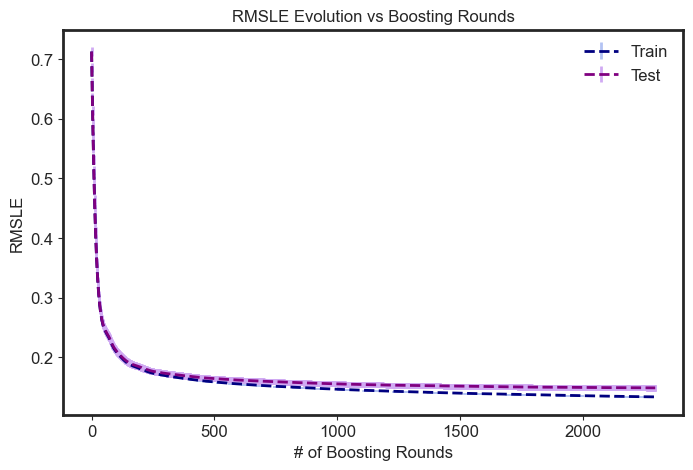

In [7]:
# plot cv results
reg.plot_cv_results()

In [8]:
# feature importrance (reg.get_feature_importance())
reg.feature_importance_

,feature,total_gain
0,F_0,96645.765625
1,F_6,23224.902344
2,F_5,17618.478516
3,F_7,16438.132812
4,F_1,4423.494141
5,F_2,3036.347412
6,F_3,1250.468140
7,F_4,931.620422


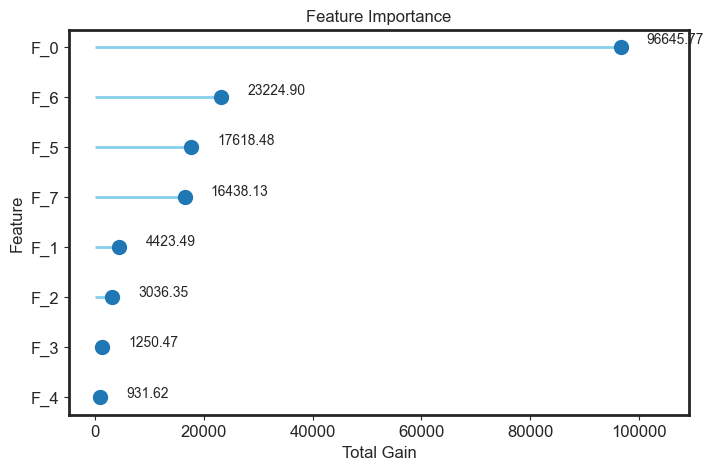

In [9]:
# plot feature importance
reg.plot_feature_importance()

In [10]:
# pred target values (or reg.y_pred_)
y_pred = reg.predict(X_test)
y_pred[:10]

array([1.9729842 , 4.022163  , 3.283781  , 0.64663863, 2.2470276 ,
       1.6732707 , 4.3805614 , 3.6267788 , 2.5370424 , 1.6359748 ],
      dtype=float32)

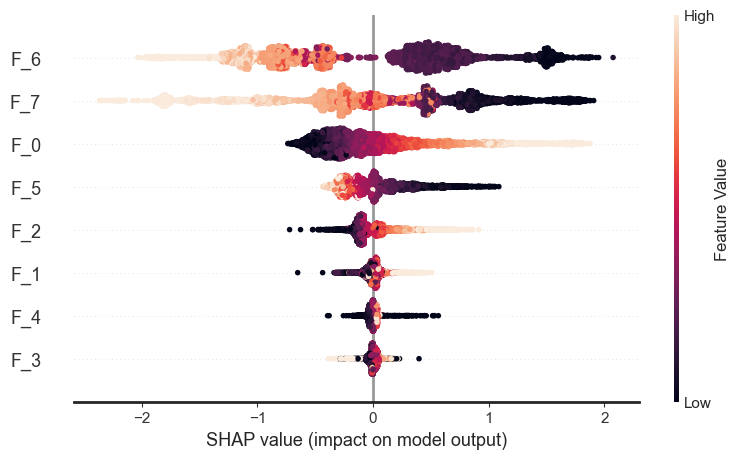

In [11]:
# shap summary plot of validation set
reg.plot_shap_summary(validation=True)

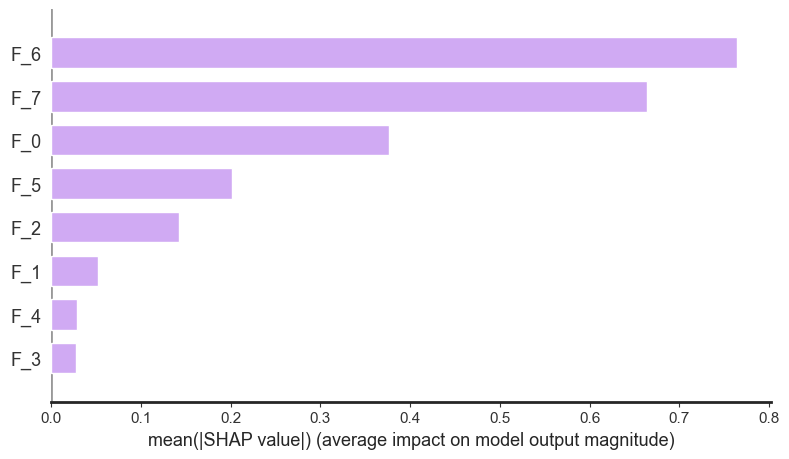

In [12]:
# shap summary bar plot of validation set
reg.plot_shap_summary(plot_type="bar")

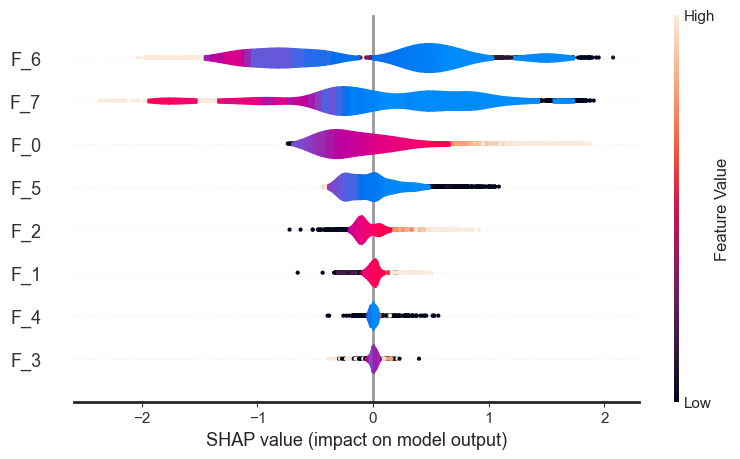

In [13]:
# shap summary plot (violin)
reg.plot_shap_summary(plot_type="violin")

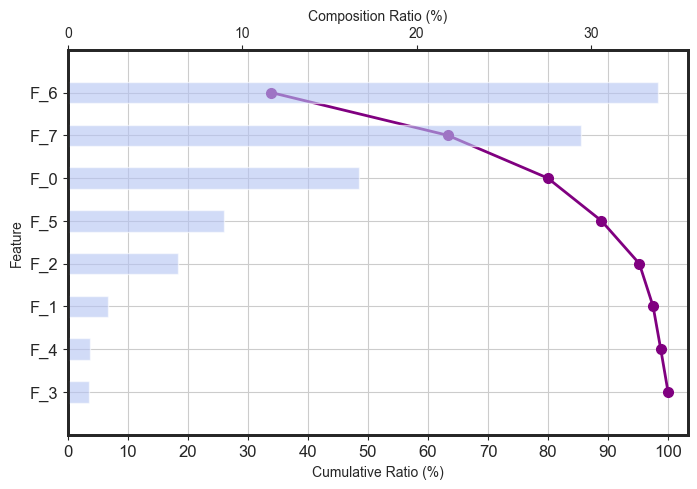

In [14]:
# plot shap waterfall plot
reg.plot_shap_waterfall()

In [15]:
# model's fitting params (or reg.params)
reg.get_params()

{'eval_metric': 'rmse',
 'tree_method': 'hist',
 'objective': 'reg:squarederror',
 'learning_rate': 0.05,
 'max_depth': 2,
 'min_child_weight': 1,
 'gamma': 0.0,
 'reg_alpha': 0.0,
 'reg_lambda': 1.0,
 'subsample': 0.9,
 'max_delta_step': 1,
 'verbosity': 0,
 'nthread': 4}

In [16]:
reg.model_

## You can use the `RegressionMetrics` class to evaluate your model

In [17]:
from slickml.metrics import RegressionMetrics

metrics = RegressionMetrics(y_test, y_pred)

,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,0.825000,0.825000,0.332000,0.235000,0.022000,0.189000,0.870000,0.366000,1.057000


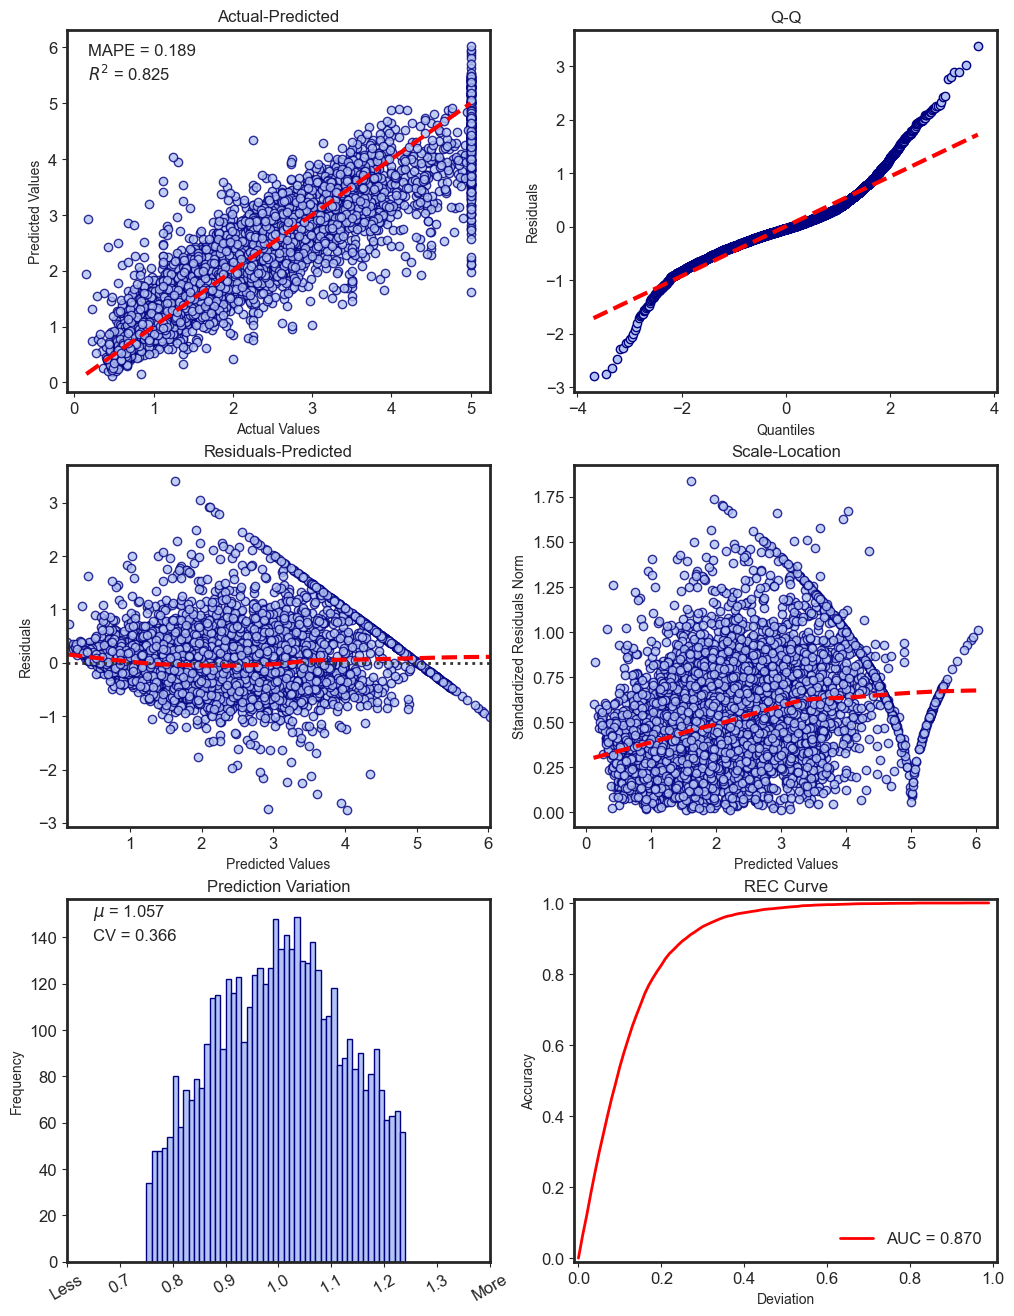

In [18]:
metrics.plot()